In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

%config Completer.use_jedi = False

In [2]:
df = pd.read_csv("./datasets/Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
pd.get_dummies(df, drop_first = True)

,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_14-Nov,availability_15-Aug,availability_15-Dec,availability_15-Jun,...,total_sqft_990,total_sqft_991,total_sqft_992,total_sqft_993,total_sqft_994,total_sqft_995,total_sqft_996,total_sqft_997,total_sqft_998,total_sqft_999
0,2.0,1.0,39.07,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,3.0,120.00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,3.0,62.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1.0,95.00,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1.0,51.00,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,4.0,0.0,231.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13316,5.0,NaN,400.00,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,2.0,1.0,60.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,4.0,1.0,488.00,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df["size"].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 Bedroom       2
11 BHK           2
10 BHK           2
12 Bedroom       1
13 BHK           1
27 BHK           1
16 BHK           1
14 BHK           1
19 BHK           1
18 Bedroom       1
43 Bedroom       1
Name: size, dtype: int64

In [5]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df = df.drop(columns=["society"])
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


## Data Preprocessing

In [7]:
df.balcony.value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [8]:
df["balcony"] = df["balcony"].fillna(2.0)
df.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [9]:
df.bath.value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
18.0       1
40.0       1
15.0       1
14.0       1
Name: bath, dtype: int64

In [10]:
df["size"].value_counts().head()

2 BHK        5199
3 BHK        4310
4 Bedroom     826
4 BHK         591
3 Bedroom     547
Name: size, dtype: int64

In [11]:
df["bath"] = df["bath"].fillna(2.0)
df["location"] = df["location"].fillna(2.0)
df["size"] = df["size"].fillna(2)
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [12]:
rooms = df["size"].values
rooms

array(['2 BHK', '4 Bedroom', '3 BHK', ..., '2 BHK', '4 BHK', '1 BHK'],
      dtype=object)

In [13]:
type(df["size"])

pandas.core.series.Series

In [14]:
df["bhk"] = df["size"].apply(lambda x: int(str(x).split(" ")[0]))

In [15]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [16]:
df.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [17]:
# looking for outliers
df[df["bhk"] > 20]

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Plot Area,Ready To Move,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   size          13320 non-null  object 
 4   total_sqft    13320 non-null  object 
 5   bath          13320 non-null  float64
 6   balcony       13320 non-null  float64
 7   price         13320 non-null  float64
 8   bhk           13320 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 936.7+ KB


In [19]:
df.loc[df["total_sqft"].str.contains("-"),"total_sqft"] = df.loc[df["total_sqft"].str.contains("-")]["total_sqft"].str[:4]

In [20]:
df[df["total_sqft"].str.contains("-")]["total_sqft"]

Series([], Name: total_sqft, dtype: object)

In [21]:
def is_float(x):
    '''
    Function to check is float dtype.
    '''
    try:
        float(x)
    except:
        return False
    return True

In [22]:
# finding values which can't be converted to float values
df.shape[0] - df["total_sqft"].apply(is_float).sum()

46

In [23]:
# Leaving those 46 rows 
df = df[df['total_sqft'].apply(is_float) == True]
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [24]:
convert_dict = {"total_sqft":float}
df = df.astype(convert_dict)

In [25]:
df["total_sqft"].dtype

dtype('float64')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13274 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13274 non-null  object 
 1   availability  13274 non-null  object 
 2   location      13274 non-null  object 
 3   size          13274 non-null  object 
 4   total_sqft    13274 non-null  float64
 5   bath          13274 non-null  float64
 6   balcony       13274 non-null  float64
 7   price         13274 non-null  float64
 8   bhk           13274 non-null  int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 1.0+ MB


In [27]:
new_df = df.drop(columns = ["size"])
new_df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2


In [28]:
len(new_df["location"].unique())

1300

In [29]:
new_df["location"].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [30]:
len(new_df["area_type"].unique())

4

In [31]:
len(new_df["availability"].unique())

81

In [32]:
new_df["availability"].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [33]:
new_df.drop(columns = ["availability"], inplace= True)

In [34]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
new_df["location"].value_counts()

Whitefield                                            538
Sarjapur  Road                                        399
Electronic City                                       302
Kanakpura Road                                        271
Thanisandra                                           233
Yelahanka                                             213
Uttarahalli                                           186
Hebbal                                                177
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Hennur Road                                           152
Bannerghatta Road                                     151
7th Phase JP Nagar                                    148
Haralur Road                                          142
Electronic City Phase II                              132
Rajaji Nagar                                          107
Chandapura                                            100
Bellandur     

In [35]:
new_df["location"] = new_df["location"].astype(str)

In [36]:
new_df["location"] = new_df["location"].apply(lambda x:x.strip())
new_df["location"]

0                                 Electronic City Phase II
1                                         Chikka Tirupathi
2                                              Uttarahalli
3                                       Lingadheeranahalli
4                                                 Kothanur
5                                               Whitefield
6                                         Old Airport Road
7                                             Rajaji Nagar
8                                             Marathahalli
9                                             Gandhi Bazar
10                                              Whitefield
11                                              Whitefield
12                                      7th Phase JP Nagar
13                                               Gottigere
14                                                Sarjapur
15                                             Mysore Road
16                                           Bisuvanahal

In [37]:
len(new_df["location"].unique())

1289

In [38]:
location_stats = new_df.groupby("location")["location"].agg("count").sort_values(ascending=False)
pd.set_option("display.max_rows",20)
location_stats

location
Whitefield              539
Sarjapur  Road          399
Electronic City         304
Kanakpura Road          271
Thanisandra             236
                       ... 
Kumbhena Agrahara         1
Kudlu Village,            1
Konappana Agrahara        1
Kodanda Reddy Layout      1
1 Annasandrapalya         1
Name: location, Length: 1289, dtype: int64

In [39]:
location_stats_less_than_10 = location_stats[location_stats<=20]
location_stats_less_than_10

location
Yelachenahalli          20
Sanjay nagar            20
Poorna Pragna Layout    20
HBR Layout              20
HRBR Layout             19
                        ..
Kumbhena Agrahara        1
Kudlu Village,           1
Konappana Agrahara       1
Kodanda Reddy Layout     1
1 Annasandrapalya        1
Name: location, Length: 1145, dtype: int64

In [40]:
len(new_df["location"].unique()) - len(location_stats_less_than_10)

144

In [41]:
new_df["location"] = new_df["location"].apply(lambda x: "other" if x in location_stats_less_than_10 else x)

In [42]:
len(new_df["location"].unique())

145

In [43]:
new_df[new_df["location"] == "other"]

,area_type,location,total_sqft,bath,balcony,price,bhk
1,Plot Area,other,2600.0,5.0,3.0,120.0,4
9,Plot Area,other,1020.0,6.0,2.0,370.0,6
18,Super built-up Area,other,2770.0,4.0,2.0,290.0,3
19,Super built-up Area,other,1100.0,2.0,2.0,48.0,2
25,Super built-up Area,other,1250.0,3.0,2.0,56.0,3
...,...,...,...,...,...,...,...
13298,Super built-up Area,other,1015.0,2.0,2.0,60.0,2
13302,Super built-up Area,other,1075.0,2.0,2.0,48.0,2
13306,Plot Area,other,1200.0,5.0,2.0,325.0,4
13307,Built-up Area,other,1805.0,3.0,3.0,134.0,3


## Data Cleaning

* removing outliers

In [44]:
new_df.head()

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,other,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2


In [45]:
new_df.bath.unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [46]:
new_df[new_df["bath"] > 10]

,area_type,location,total_sqft,bath,balcony,price,bhk
938,Plot Area,5th Phase JP Nagar,1260.0,11.0,2.0,290.0,9
1078,Plot Area,other,3300.0,14.0,2.0,500.0,9
1718,Super built-up Area,other,8000.0,27.0,0.0,230.0,27
1768,Plot Area,other,1200.0,11.0,0.0,170.0,11
1953,Plot Area,KR Puram,1200.0,12.0,2.0,110.0,8
1979,Plot Area,other,990.0,12.0,0.0,120.0,8
3096,Super built-up Area,other,12000.0,12.0,2.0,525.0,10
3379,Super built-up Area,other,2000.0,16.0,2.0,490.0,19
3609,Super built-up Area,other,10000.0,16.0,2.0,550.0,16
4684,Plot Area,Munnekollal,2400.0,40.0,0.0,660.0,43


In [47]:
# This is not possible
new_df[new_df["bath"] > new_df["bhk"] +2]

,area_type,location,total_sqft,bath,balcony,price,bhk
1078,Plot Area,other,3300.0,14.0,2.0,500.0,9
1953,Plot Area,KR Puram,1200.0,12.0,2.0,110.0,8
1979,Plot Area,other,990.0,12.0,0.0,120.0,8
2620,Super built-up Area,other,11338.0,9.0,1.0,1000.0,6
6838,Super built-up Area,Rajaji Nagar,7500.0,8.0,3.0,1700.0,5
6937,Plot Area,other,2600.0,12.0,2.0,675.0,9
7709,Built-up Area,other,2460.0,7.0,2.0,80.0,4
8106,Plot Area,other,1850.0,12.0,2.0,300.0,8
9974,Plot Area,other,2400.0,6.0,2.0,775.0,3
9990,Plot Area,other,1200.0,9.0,3.0,122.0,6


In [48]:
df3 = new_df[new_df["bath"] < new_df["bhk"] +2]
df3.shape

(13100, 7)

In [49]:
# Every room should be atleast 300 sqft
df3[df3["total_sqft"]/df["bhk"] < 300].head()

D:\Setups\Anaconda\Setup\envs\tensor\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,area_type,location,total_sqft,bath,balcony,price,bhk
9,Plot Area,other,1020.0,6.0,2.0,370.0,6
45,Plot Area,HSR Layout,600.0,9.0,2.0,200.0,8
58,Plot Area,other,1407.0,4.0,1.0,150.0,6
68,Plot Area,other,1350.0,7.0,0.0,85.0,8
70,Plot Area,other,500.0,3.0,2.0,100.0,3


In [50]:
df4 = df3[~(df3["total_sqft"]/df["bhk"] < 300)]
df4.shape

D:\Setups\Anaconda\Setup\envs\tensor\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(12375, 7)

In [51]:
# Since price is in lakh so we multiply it by 100000
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

D:\Setups\Anaconda\Setup\envs\tensor\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,other,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [52]:
df4.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,12375.000000,12375.000000,12375.000000,12375.000000,12375.000000,12375.000000
mean,1566.811375,2.514990,1.604202,107.448321,2.633212,6253.076171
std,1231.935643,0.994366,0.794934,138.572038,0.959506,4058.362497
min,300.000000,1.000000,0.000000,8.440000,1.000000,267.829813
25%,1113.000000,2.000000,1.000000,49.000000,2.000000,4202.716447
50%,1299.000000,2.000000,2.000000,69.250000,3.000000,5283.259071
75%,1688.000000,3.000000,2.000000,113.000000,3.000000,6863.905325
max,52272.000000,16.000000,3.000000,2912.000000,16.000000,176470.588235


In [53]:
# Removing outlier based on mean and std deviation, to remove outlier i have consider 1st std deviation
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df5 = remove_pps_outliers(df4)
df5.shape

(10374, 8)

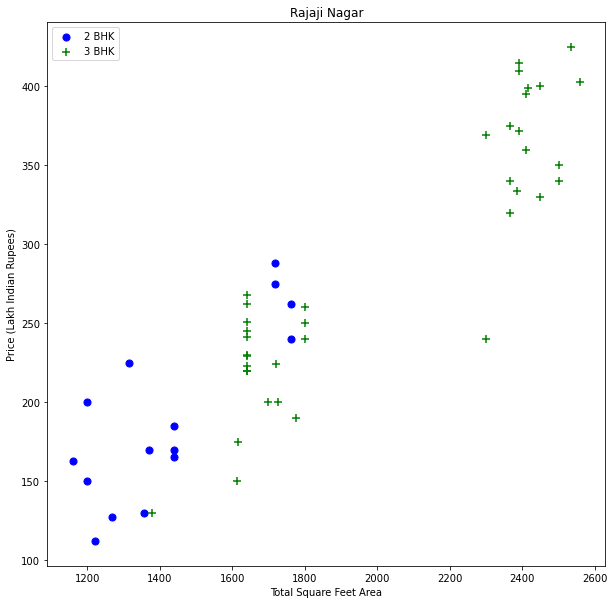

In [54]:
# Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (10,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"Rajaji Nagar")

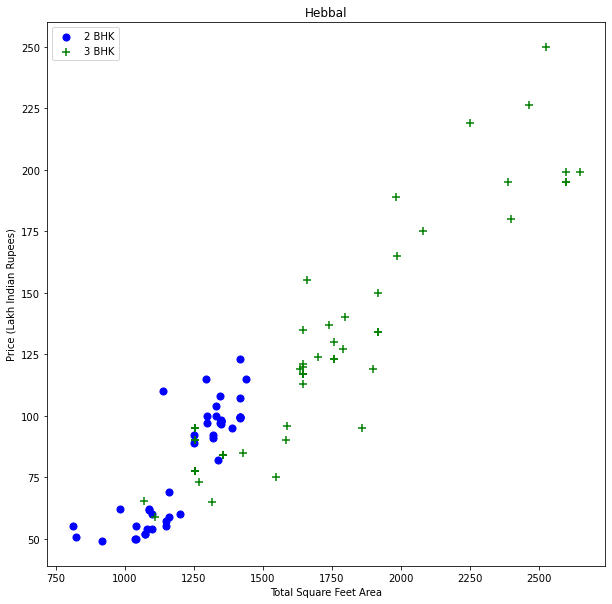

In [55]:
plot_scatter_chart(df5,"Hebbal")

##  Making a dictionary

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    }  
}
<br><br>
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [56]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')


df6 = remove_bhk_outliers(df5)
df6.shape

(6916, 8)

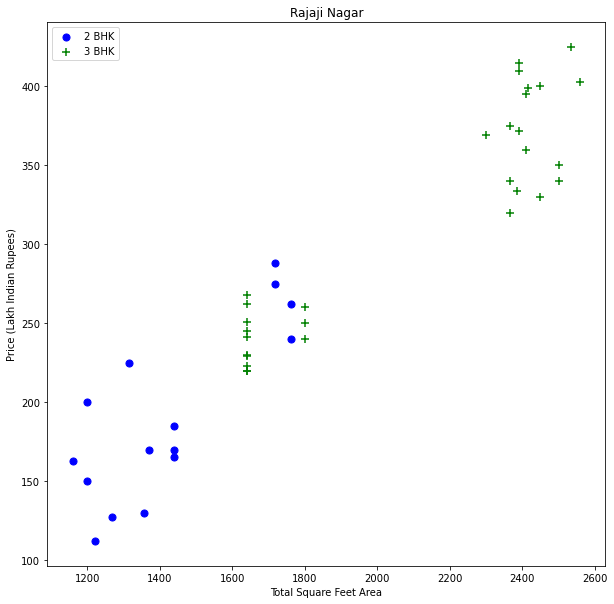

In [57]:
# Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties

plot_scatter_chart(df6,"Rajaji Nagar")

In [58]:
dummies = pd.get_dummies(df6, drop_first = True)

In [59]:
dummies.shape

(6916, 153)

In [60]:
dummies.keys()

Index(['total_sqft', 'bath', 'balcony', 'price', 'bhk', 'price_per_sqft',
       'area_type_Carpet  Area', 'area_type_Plot  Area',
       'area_type_Super built-up  Area', 'location_2nd Stage Nagarbhavi',
       ...
       'location_Uttarahalli', 'location_Varthur', 'location_Vidyaranyapura',
       'location_Vijayanagar', 'location_Vittasandra', 'location_Whitefield',
       'location_Yelahanka', 'location_Yelahanka New Town',
       'location_Yeshwanthpur', 'location_other'],
      dtype='object', length=153)

## Train Test split

In [61]:
X = dummies.drop("price", axis =1)
y = dummies["price"]

print("Shape of X = ",X.shape)
print("Shape of y = ",y.shape)

Shape of X =  (6916, 152)
Shape of y =  (6916,)


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 41)

print("Shape of X train = ",X_train.shape)
print("Shape of y train = ",y_train.shape)
print("Shape of X test = ",X_test.shape)
print("Shape of y test = ",y_test.shape)

Shape of X train =  (5532, 152)
Shape of y train =  (5532,)
Shape of X test =  (1384, 152)
Shape of y test =  (1384,)


## Feature Scaling

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## Model Training

In [64]:
lr = LinearRegression()
 
lr.fit(X_train, y_train)

LinearRegression()

In [65]:
lr.coef_ # beta0, beta1, .... betaN

array([ 6.33254547e+01,  1.96575938e+00, -3.81645020e-01, -5.81283702e+00,
        3.96843325e+01, -1.05723064e-01, -1.69813358e+00,  8.00810426e-01,
       -6.06367589e-01,  3.50412631e-01,  2.09567966e-01,  3.21049720e-01,
        7.17227013e-01,  6.98758612e-01,  9.49021658e-01,  5.45062697e-01,
        1.90343086e-01, -1.38675608e-01,  6.12048267e-01,  9.44568398e-01,
        1.89930000e+00,  1.97251446e+00,  5.67901682e-02,  2.84039092e+00,
        9.04770809e-01,  8.33848967e-01,  2.60470360e-01,  6.55707433e-01,
        4.35131532e-01,  1.02646773e+00, -9.04527949e-02,  5.53714055e-01,
        4.34203535e-01,  1.49329091e+00,  8.25690476e-01,  1.90597857e-01,
       -2.79710833e-01,  1.70944113e+00,  8.31707155e-01,  1.55405705e+00,
        1.23388997e+00,  4.36623040e-01,  6.62816747e-01,  5.90237543e-01,
        3.78735720e+00,  1.43051376e+00,  7.34636314e-01,  6.43697546e-01,
        5.71761489e-01,  6.81714746e-01,  1.50162430e+00, -1.23334903e-01,
       -1.00583000e-02,  

In [66]:
lr.intercept_

97.00815618221255

## Predict the value of Home and Test

In [67]:
X_test[0, :]

array([-0.63634159, -0.44008746, -0.7046351 , -0.53438341, -1.21463248,
       -0.0750689 , -0.30859143,  0.61635642, -0.02329364, -0.05552029,
       -0.04662524, -0.10988468, -0.07259375, -0.06318814, -0.05214277,
       -0.0750689 , -0.05037014, -0.05870604, -0.05037014, -0.05037014,
       -0.05385771, -0.05385771, -0.04853349, -0.06871769, -0.05713508,
       -0.05037014, -0.06023659, -0.08850904, -0.05214277, -0.12787211,
       -0.03805556, -0.03805556, -0.05037014, -0.08641044, -0.10203411,
       -0.05870604, -0.04036767, -0.06318814, -0.04463623, -0.06737712,
       -0.04255512, -0.06871769, -0.07384147, -0.05870604, -0.09646176,
       -0.06172974, -0.04853349, -0.05037014, -0.05870604, -0.05552029,
       17.03402168, -0.05385771, -0.04662524, -0.15875722, -0.11483385,
       -0.07979417, -0.05552029, -0.07259375, -0.06737712, -0.0355945 ,
       -0.04662524, -0.07627701, -0.13568134, -0.09550266, -0.12266161,
       -0.05552029, -0.06737712, -0.08205726, -0.12932466, -0.07

In [68]:
lr.predict([X_test[0,:]])

array([28.4688597])

In [69]:
y_test

1536      32.9
67        72.0
9306      65.0
4508      57.9
8776      95.0
         ...  
6708     103.0
5968      50.0
10036     59.0
501       25.0
5664      50.0
Name: price, Length: 1384, dtype: float64

In [70]:
lr.predict(X_test)

array([28.4688597 , 71.43240308, 61.41889818, ..., 56.0334236 ,
       28.53636575, 32.31524517])

In [71]:
lr.score(X_test, y_test) * 100

94.67526011562215

## Implementing Ridge and Lasso Regression

In [72]:
from sklearn.linear_model import Ridge, Lasso

In [73]:
rd = Ridge(alpha=0.5)
rd.fit(X_train, y_train)

rd.score(X_test,y_test)*100

94.67463018017608

In [74]:
ls = Lasso(alpha=2)
ls.fit(X_train, y_train)

ls.score(X_test,y_test)*100

93.5528708271147

## Model Evaluation

### Root Mean Squared Error

In [75]:
y_pred = lr.predict(X_test)
print(y_pred)
print("\nActual Values are:")
y_test

[28.4688597  71.43240308 61.41889818 ... 56.0334236  28.53636575
 32.31524517]

Actual Values are:


1536      32.9
67        72.0
9306      65.0
4508      57.9
8776      95.0
         ...  
6708     103.0
5968      50.0
10036     59.0
501       25.0
5664      50.0
Name: price, Length: 1384, dtype: float64

In [76]:
from sklearn.metrics import mean_squared_error

In [77]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE: ",mse,"\nRMSE: ",rmse)

MSE:  291.5689733624518 
RMSE:  17.075390869975767


## Polynomial Regression Model

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [79]:
poly_reg = PolynomialFeatures(degree=2)

poly_reg.fit(X_train)
X_train_poly = poly_reg.transform(X_train)
X_test_poly = poly_reg.transform(X_test)

In [80]:
print("Train Data: ",X_train.shape,"\nPoly Train Data: ",X_train_poly.shape)
print("\nTest Data: ",X_train.shape,"\nPoly Test Data: ",X_test_poly.shape)

Train Data:  (5532, 152) 
Poly Train Data:  (5532, 11781)

Test Data:  (5532, 152) 
Poly Test Data:  (1384, 11781)


In [81]:
poly_lr = LinearRegression()
 
poly_lr.fit(X_train_poly, y_train)

LinearRegression()

In [82]:
poly_lr.score(X_test_poly, y_test)

0.998306347365932

In [83]:
poly_lr.predict([X_test_poly[0,:]])

array([32.9])

In [84]:
y_pred = poly_lr.predict(X_test_poly)
print(y_pred)
print("\nActual Values are:")
y_test

[32.9 72.  65.  ... 59.  25.  50. ]

Actual Values are:


1536      32.9
67        72.0
9306      65.0
4508      57.9
8776      95.0
         ...  
6708     103.0
5968      50.0
10036     59.0
501       25.0
5664      50.0
Name: price, Length: 1384, dtype: float64

In [85]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE: ",mse,"\nRMSE: ",rmse)

MSE:  9.2740034343578 
RMSE:  3.045324848740738


## Using Support Vector Regression

In [86]:
svr_rbf = SVR(kernel = "rbf")
svr_rbf.fit(X_train, y_train)
svr_rbf.score(X_test, y_test)

0.45940818172059883

In [91]:
svr_poly = SVR(kernel = "poly", degree = 2)
svr_poly.fit(X_train, y_train)
svr_poly.score(X_test, y_test)

0.11738505200088678

In [88]:
svr_linear = SVR(kernel = "linear")
svr_linear.fit(X_train, y_train)
svr_linear.score(X_test, y_test)

0.9316336342226518

## Using Decision Tree Regressor

In [93]:
dt_regressor = DecisionTreeRegressor(criterion="mse")
dt_regressor.fit(X_train, y_train)
dt_regressor.score(X_test, y_test)

0.9815717819149959

## Using Random Forest Regression

In [115]:
rf_regressor = RandomForestRegressor(n_estimators=100, criterion="mse")
rf_regressor.fit(X_train, y_train)
rf_regressor.score(X_test, y_test)

0.9830660024261317

In [116]:
rf_regressor = RandomForestRegressor(n_estimators=500, criterion="mse")
rf_regressor.fit(X_train, y_train)
rf_regressor.score(X_test, y_test)

0.983474078737384

## Using K Nearest Neighbour

In [125]:
knn_regressor = KNeighborsRegressor(n_neighbors = 4)
knn_regressor.fit(X_train, y_train)
knn_regressor.score(X_test, y_test)

0.8724609527070571

## Predict House Price

In [110]:
index = 1
house = X_test[index,:]
house

array([-0.46951425, -0.44008746,  0.56881847, -0.53438341,  0.23147635,
       -0.0750689 , -0.30859143, -1.62243788, -0.02329364, -0.05552029,
       -0.04662524,  9.10044954, -0.07259375, -0.06318814, -0.05214277,
       -0.0750689 , -0.05037014, -0.05870604, -0.05037014, -0.05037014,
       -0.05385771, -0.05385771, -0.04853349, -0.06871769, -0.05713508,
       -0.05037014, -0.06023659, -0.08850904, -0.05214277, -0.12787211,
       -0.03805556, -0.03805556, -0.05037014, -0.08641044, -0.10203411,
       -0.05870604, -0.04036767, -0.06318814, -0.04463623, -0.06737712,
       -0.04255512, -0.06871769, -0.07384147, -0.05870604, -0.09646176,
       -0.06172974, -0.04853349, -0.05037014, -0.05870604, -0.05552029,
       -0.05870604, -0.05385771, -0.04662524, -0.15875722, -0.11483385,
       -0.07979417, -0.05552029, -0.07259375, -0.06737712, -0.0355945 ,
       -0.04662524, -0.07627701, -0.13568134, -0.09550266, -0.12266161,
       -0.05552029, -0.06737712, -0.08205726, -0.12932466, -0.07

In [111]:
dt_regressor.predict([house])

array([73.])

In [112]:
y_test.iloc[index]

72.0